## Plotting barcode

Imports

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline  

Getting example's barcode

In [19]:
barcode = ['0 1.0 inf', '0 1.0 2.0', '0 1.0 2.0', '0 3.0 4.0', '1 4.0 inf', '1 5.0 6.0']

Getting barcode

In [ ]:
filepath = "../c++/barcodes/barcode_A"


In [20]:
verts = []
for item in barcode:
    aux = item.split()
    vert = float(aux[2])
    if vert != float('inf'):
        verts.append(vert)

for item in barcode:
    aux = item.split()
    vert = float(aux[1])
    verts.append(vert)

    
maxvert = max(verts)
minvert = min(verts)

In [21]:
dimension = []
for item in barcode:
    aux = item.split()
    dim = float(aux[0])
    dimension.append(dim)
    
alldimensions = list(set(dimension))

dimqty = []

for dim in alldimensions:
    dimqty.append(dimension.count(dim))

totaldim = len(alldimensions)

yforgraphic = []

for dim in alldimensions:
    auxnum = totaldim - dim
    yforgraphic.append(np.linspace(2*auxnum, 2*(auxnum)-1, num = dimqty[int(dim)]))
    
iforplot = []
for qty in dimqty:
    iforplot += range(qty)

Plotting barcode

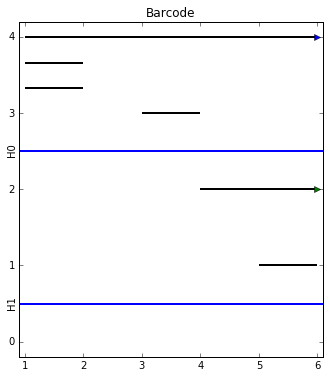

In [22]:
M = len(barcode)

fig = plt.figure(figsize=(12, 6))

t = np.linspace(0.0, 5.0, num=M)

hax = fig.add_subplot(122)

#####horizontal line
for i,item in enumerate(barcode):
    auxlist = item.split()
    dim = float(auxlist[0])
    beg = float(auxlist[1])
    end = float(auxlist[2])
    if end == float('inf'):
        hax.hlines(yforgraphic[int(dim)][iforplot[i]], beg, maxvert, lw=2)
        hax.plot(maxvert, yforgraphic[int(dim)][iforplot[i]], '>')
    else:
        hax.hlines(yforgraphic[int(dim)][iforplot[i]], beg, end, lw=2)
        
for dim in alldimensions:
    auxnum = totaldim - dim
    hax.hlines(2*(auxnum)-1.5, minvert-0.1,maxvert+0.1, colors = 'b',lw=2)
    plt.text(minvert-0.3,2*(auxnum)-1.5,'H'+str(int(dim)),rotation=90)

hax.set_title('Barcode')
axes = plt.gca()
axes.set_xlim([minvert-0.1,maxvert+0.1])
axes.set_ylim([-0.2,2*totaldim+0.2])

plt.show()